# Regressão linear com uma variável

A regressão linear com uma variável é um modelo de regressão que estima a relação entre uma variável independente e uma variável dependente através de uma função linear que prevê os valores da variável dependente como uma função da variável independente.

## Bibliotecas

Serão utilizadas as bibliotecas numpy para a realização de operações matemáticas em array e matrizes multidimensionais, pandas para a importação do dataset e matplotlib para plotagem de gráficos.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importação dos dados

O dataset utilizado contém os dados do lucro de uma cadeia de *food truck* em diferentes cidades. A primeira coluna do dataset corresponde à população de cada cidade, enquanto que a segunda coluna corresponde ao lucro da filial daquela cidade. Ao longo do trabalho a população da cidade é denominada pela variável *X* e o lucro da filial é denominado pela variável *y*.

In [125]:
data = pd.read_csv('data/ex1data1.txt', header = None)

In [126]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [127]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [135]:
X = np.array(data.iloc[:,0])
y = np.array(data.iloc[:,1])
m = len(y)

## Visualização de dados

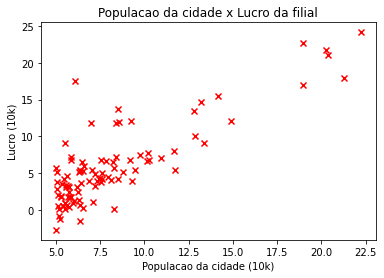

In [136]:
plt.scatter(X, y, color='red', marker='x')
plt.title('Populacao da cidade x Lucro da filial')
plt.xlabel('Populacao da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.show()

## Gradiente descendente

### Função de custo

Para a regressão linear simples a função de hipótese $h_\theta$ é definida da seguinte maneira:

$$ h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1 $$

A acurária desta função de hipótese pode ser mensurada utilizando uma função de custo. Dados os valores de $\theta_0$ e $\theta_1$, a função de custo calcula o erro quadrático médio do resultado da função de hipótese para *X*  e os resultados esperados *y*. A função de custo é definida da seguinte forma:

$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $$

In [168]:
def compute_cost(X, y, theta):
    return  (1 / (2 * m)) * np.sum((X @ theta - y) ** 2)

theta = np.zeros(2)
X_ones = np.stack([np.ones(m), X], axis=1)
cost = compute_cost(X_ones, y, theta)

print(f'O resultado da função de custo para theta {theta} é {cost}')

O resultado da função de custo para theta [0. 0.] é 32.072733877455676


### Gradiente descendente

Dadas as funções de hipótese e a função de custo podemos determinar o quão bem os parâmetros $\theta_0$ e $\theta_1$ se encaixam nos dados. O objetivo do gradiente descendente é estimar estes parâmetros para encontrar o menor valor da função de custo, ou seja, os melhores valores de $\theta_0$ e $\theta_1$ que se encaixam nos dados.

O gradiente descendente é um processo iterativo que computa a derivada da função de custo, indicando como devemos mover na curva da função de custo para encontrar o valor mínimo, associada a uma taxa de aprendizado $\alpha$, indicando o quanto devemos mover na curva da função de custo, para encontrar os próximos valores de $\theta_0$ e $\theta_1$ até convergir e encontrar o resultado. O algoritmo do gradiente descendente é definido da seguinte forma:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) \qquad \text{repetir até convergir} $$ 

Calculando a derivada obtemos a seguinte expressão:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right) x^{(i)}_j $$

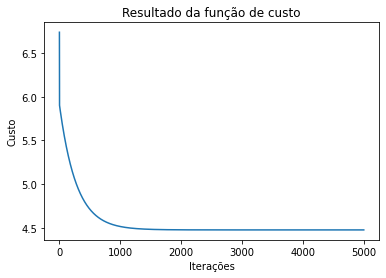

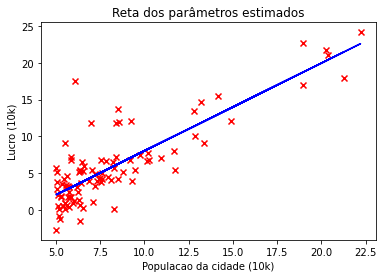

Parâmetros theta: [-3.89530051  1.19298539]
Lucro em regiões com população de 35.000 habitantes: 41750.59321117703
Lucro em regiões com população de 70.000 habitantes: 83505.08172286472


In [157]:
def gradient_descent(X, y, theta, alpha, epochs):
    cost = np.zeros(epochs)
    for i in range(epochs):
        h = X @ theta
        theta = theta - alpha * (X.T @ (h - y)) / m
        cost[i] = compute_cost(X, y, theta)
    return cost, theta

theta = np.zeros(2)
cost, theta_fit = gradient_descent(X_ones, y, theta, 0.01, 5000)

plt.plot(cost)
plt.title('Resultado da função de custo')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.show()

plt.scatter(X_ones[:,1], y, color='red', marker='x')
plt.title('Reta dos parâmetros estimados')
plt.xlabel('Populacao da cidade (10k)')
plt.ylabel('Lucro (10k)')
plt.plot(X_ones[:,1], X_ones @ theta_fit, color='blue')
plt.show()

print(f'Parâmetros theta: {theta_fit}')

print(f'Lucro em regiões com população de 35.000 habitantes: {[1., 35000.] @ theta_fit}')
print(f'Lucro em regiões com população de 70.000 habitantes: {[1., 70000.] @ theta_fit}')

## Visualização da função de custo

A função de custo possui um único mínimo global correspondente à combinação ótima de valores para $\theta_0$ e $\theta_1$, cada passo do algoritmo gradiente descendente se aproxima cada vez mais desse ponto ótimo.

In [161]:
# Inicialização dos valores para plotagem dos gráficos
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-1, 4, 100)

J = np.zeros((len(theta0_values), len(theta1_values)))

for i, theta0 in enumerate(theta0_values):
    for j, theta1 in enumerate(theta1_values):
        J[i,j] = compute_cost(X_ones, y, [theta0, theta1])

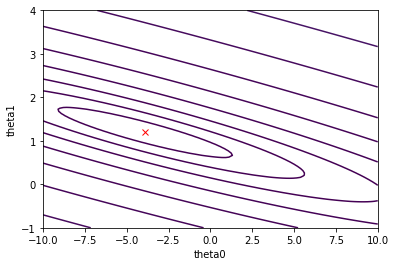

In [166]:
fig, ax = plt.subplots()
ax.contour(theta0_values, theta1_values, J.T, levels=np.logspace(-1, 4, 20))
ax.plot(theta_fit[0], theta_fit[1], 'rx')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()

O mínimo global da função de custo é exibido no gráfico no ponto marcado por um *x* vermelho.

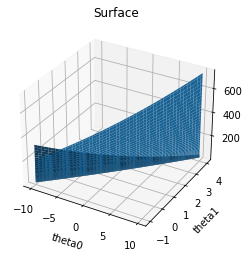

In [167]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_values, theta1_values, J.T)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')
plt.show()

O gráfico representa um recorte da superfície da função de custo.